C:\Users\harsh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - loss: 0.0123
Epoch 2/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 1.1969e-04
Epoch 3/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 1.0087e-04
Epoch 4/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 8.4060e-05
Epoch 5/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 7.5946e-05
Epoch 6/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 6.0100e-05
Epoch 7/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 5.2158e-05
Epoch 8/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 4.2771e-05
Epoch 9/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 3.9036e-05
Epoch 10/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 3.7274e-05
Epoch 11/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 3.4408e-05
Epoch 12/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 3.3976e-05
Epoch 13/20
1318/1318 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - loss: 3.3792e-05
Epoch 14/20
1318/1318 ━━━

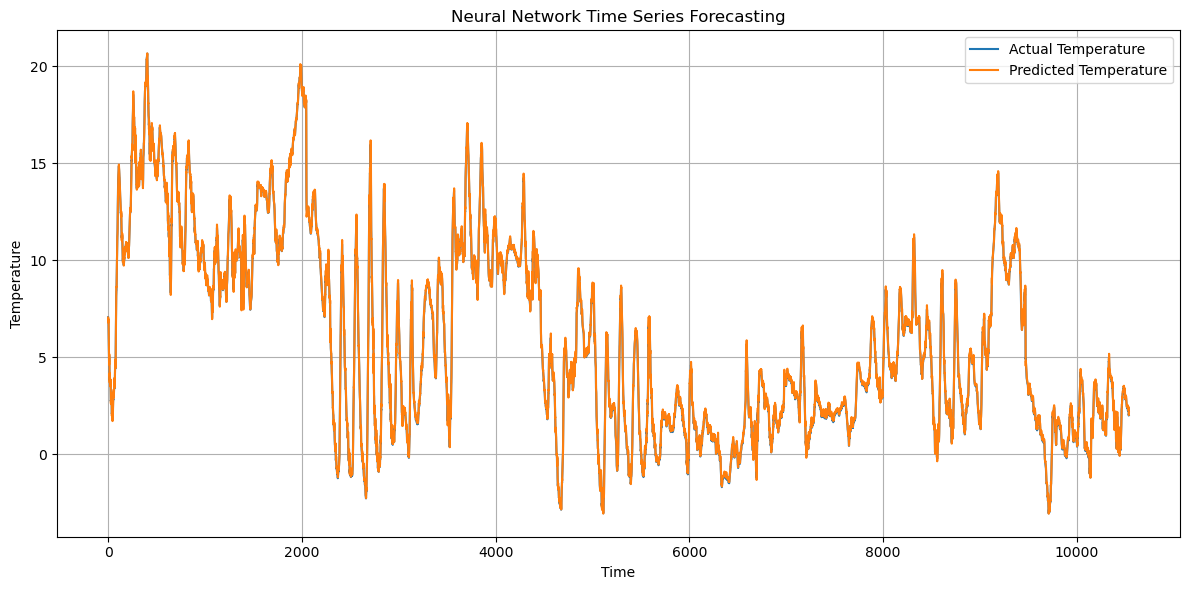

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load the dataset
df = pd.read_csv(r"C:\Users\harsh\Downloads\cleaned_weather.csv", parse_dates=['date'], index_col='date')

# Select and normalize the target column
data = df[['T']].values
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Create sequences for LSTM
def create_sequences(data, time_steps=10):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

TIME_STEPS = 10
X, y = create_sequences(data_scaled, TIME_STEPS)

# Split the data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(TIME_STEPS, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=20, verbose=1)

# Forecast
predicted = model.predict(X_test)
predicted_unscaled = scaler.inverse_transform(predicted)
y_test_unscaled = scaler.inverse_transform(y_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual Temperature')
plt.plot(predicted_unscaled, label='Predicted Temperature')
plt.title('Neural Network Time Series Forecasting')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
